## Evaluation of overhangs

In [39]:
# (A) Give a list of overhangs for each assembly:
#~ assembly_overhang_dict = {'assembly': ['GACT', 'CCCT']}

**or**

In [41]:
# (B) Compile from assembly plan and standard csv files:

# All overhangs from standard:
f = open('EMMA.csv', 'r')
overhang_table = f.read().splitlines()
f.close()

overhang_dict = {}
for entry in overhang_table:
    entry_split = entry.split(',')
    key = entry_split[0]
    overhang_dict[key] = [entry_split[1], entry_split[2]]
overhang_dict

{'slot_name': ['left_overhang', 'right_overhang'],
 'p1': ['TAGG', 'ATGG'],
 'p2': ['ATGG', 'GACT'],
 'p3': ['GACT', 'GGAC'],
 'p4': ['GGAC', 'TCCG'],
 'p5': ['TCCG', 'CCAG'],
 'p6': ['CCAG', 'CAGC'],
 'p7': ['CAGC', 'AGGC'],
 'p8': ['AGGC', 'GCGT'],
 'p8a': ['AGGC', 'ATCC'],
 'p8b': ['ATCC', 'GCGT'],
 'p9': ['GCGT', 'TGCT'],
 'p10': ['TGCT', 'GGTA'],
 'p11': ['GGTA', 'CGTC'],
 'p12': ['CGTC', 'TCAC'],
 'p13': ['TCAC', 'CTAC'],
 'p14': ['CTAC', 'GCAA'],
 'p15': ['GCAA', 'CCCT'],
 'p16': ['CCCT', 'GCTC'],
 'p17': ['GCTC', 'CGGT'],
 'p18': ['CGGT', 'GTGC'],
 'p19': ['GTGC', 'AGCG'],
 'p20': ['AGCG', 'TGGA'],
 'p21': ['TGGA', 'GTTG'],
 'p22': ['GTTG', 'CGAA'],
 'p23': ['CGAA', 'CACG'],
 'p24': ['CACG', 'ACTG'],
 'p25': ['ACTG', 'ACGA']}

In [42]:
# Obtain overhangs from assembly plan:
f = open('assembly.csv', 'r')
assembly_plan = f.read().splitlines()
f.close()

In [43]:
assembly_overhang_dict = {}
for assembly in assembly_plan:
    overhangs = []
    assembly_split = assembly.split(',')
    name = assembly_split[0]
    parts = list(filter(None, assembly_split[1:]))
    for part in parts:
        position = part[:3]
        if position[2] == '_':
            position = position[:2]
        overhangs = overhangs + overhang_dict[position]
    overhangs = list(set(overhangs))
    assembly_overhang_dict[name] = overhangs

In [44]:
assembly_overhang_dict

{'construct1': ['CTAC', 'TAGG', 'ATGG', 'GACT', 'GGAC', 'TCAC'],
 'construct2': ['ACGA', 'GCTC', 'CCCT', 'GCAA', 'ACTG']}

---

## Results

In [45]:
temp = '37C'
time = '01h'

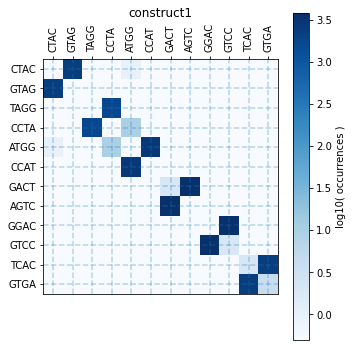

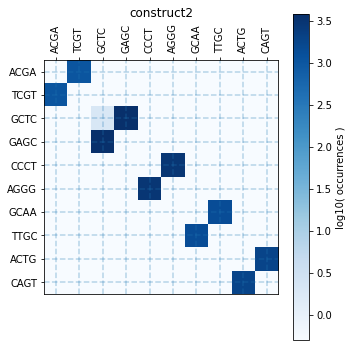

In [53]:
# Overhang misannealing data
import tatapov
data = tatapov.annealing_data[temp][time]
for assembly, overhangs in assembly_overhang_dict.items():
    subset = tatapov.data_subset(data, overhangs, add_reverse=True)

    # Plot the data subset
    ax, _ = tatapov.plot_data(subset, figwidth=5)
    ax.figure.tight_layout()
    ax.axes.set_title(assembly)

---

In [48]:
# Predict assembly accuracy
import kappagate
for assembly, overhangs in assembly_overhang_dict.items():
    slots = kappagate.overhangs_list_to_slots(overhangs)
    predicted_rate, _, _ = kappagate.predict_assembly_accuracy(slots, annealing_data=(temp, time))
    print(predicted_rate)
    print("The predicted success rate for %s is %.1f%%" % (assembly, predicted_rate*100))
    print()

0.9869608826479438
The predicted success rate for construct1 is 98.7%

0.9979959919839679
The predicted success rate for construct2 is 99.8%



---

In [49]:
# Colony picking statistics
cDNA_assembly = 'construct1'
assembly_overhang_dict[cDNA_assembly]

['CTAC', 'TAGG', 'ATGG', 'GACT', 'GGAC', 'TCAC']

The valid colony rate is 99.2%. Expect 1.0 clones in average until success. Pick 1 clones or more for 95% chances of at least one success. If no success after 1 clones, there is likely another problem (p-value=0.01)


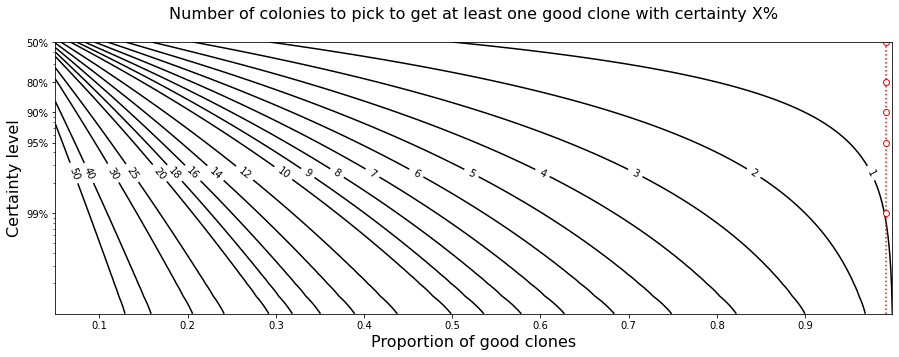

In [30]:
slots = kappagate.overhangs_list_to_slots(assembly_overhang_dict[cDNA_assembly])
predicted_rate, _, _ = kappagate.predict_assembly_accuracy(slots, annealing_data=(temp, time))
ax = kappagate.plot_colony_picking_graph(success_rate=predicted_rate)
# ax.figure.savefig("success_rate_facts.png", bbox_inches='tight')

print (kappagate.success_rate_facts(predicted_rate, plain_text=True))